<a href="https://colab.research.google.com/github/Gilf641/EVA4/blob/master/S7/S7_AssignmentSolution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Load required libraries**

In [0]:
from __future__ import print_function
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
%matplotlib inline
import matplotlib.pyplot as plt
from torch.optim.lr_scheduler import OneCycleLR
import torchvision

In [4]:
# mount the drive 
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# add path to our library in default search path
import sys
sys.path.append('/content/drive/My Drive/EVA4B2-TSAI/vision_library')

In [0]:
# Apply Image Transforms

import image_transformations
import numpy as np
from torchvision import transforms

channel_means = (0.5, 0.5, 0.5)
channel_stdevs = (0.5, 0.5, 0.5)
trans = image_transformations.Transforms(normalize=True, mean=channel_means, stdev=channel_stdevs)

train_transform = trans.train_transforms()
test_transform = trans.test_transforms()
                                       

In [7]:
# Load Train & Test Dataset

train = torchvision.datasets.CIFAR10(root = './data', train = True, download = True, transform = train_transform)
trainloader = torch.utils.data.DataLoader(train, batch_size=128, shuffle=True, num_workers=4)

test = torchvision.datasets.CIFAR10(root = './data', train = False, download = True, transform = test_transform)
testloader = torch.utils.data.DataLoader(test, batch_size=128, shuffle=False, num_workers=4)


classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


**Show some Images**

  car  bird  bird  frog


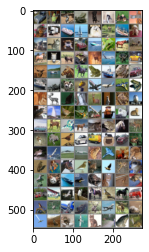

In [8]:

import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5  # unnormalize this is make sure the image is visible, if this step is skipped then the resulting images have a dark portion
    npimg = img.numpy()   # converting image to numpy array format
    plt.imshow(np.transpose(npimg, (1, 2, 0)))    # transposing npimg array


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [14]:
# Model Summary

import cifar10_models as models
!pip install torchsummary
from torchsummary import summary


use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print('Device set to', device)
model = models.cfarResNet(False).to(device)
summary(model, input_size=(3, 32, 32))


Device set to cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 34, 34]             432
              ReLU-2           [-1, 16, 34, 34]               0
       BatchNorm2d-3           [-1, 16, 34, 34]              32
           Dropout-4           [-1, 16, 34, 34]               0
            Conv2d-5           [-1, 32, 34, 34]           4,608
              ReLU-6           [-1, 32, 34, 34]               0
       BatchNorm2d-7           [-1, 32, 34, 34]              64
           Dropout-8           [-1, 32, 34, 34]               0
            Conv2d-9           [-1, 32, 32, 32]           9,216
             ReLU-10           [-1, 32, 32, 32]               0
      BatchNorm2d-11           [-1, 32, 32, 32]              64
          Dropout-12           [-1, 32, 32, 32]               0
           Conv2d-13           [-1, 32, 32, 32]           9,216
             ReLU-14

In [11]:
import execute # this is to train & test the model

model = models.cfarResNet().to(device)

optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9, weight_decay=1e-4)
scheduler = torch.optim.lr_scheduler.OneCycleLR(optimizer, max_lr=0.1, steps_per_epoch=len(trainloader), epochs=15)

model1 = execute.Test_Train()
EPOCHS = 15
for epoch in range(1,EPOCHS+1):
  print("EPOCH:", epoch)
  model1.train(model, device, trainloader, optimizer, epoch, scheduler, L1lambda=1e-5)
  model1.test(model, device, testloader,"model.pt")

  0%|          | 0/391 [00:00<?, ?it/s]

EPOCH: 1


Loss=1.3030799627304077 Batch_id=390 Accuracy=42.23: 100%|██████████| 391/391 [00:20<00:00, 18.72it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Validation loss has  decreased (inf --> 1.3046).  Saving model ...

Test set: Average loss: 1.3046, Accuracy: 5325/10000 (53.25%)

EPOCH: 2


Loss=1.018509030342102 Batch_id=390 Accuracy=61.10: 100%|██████████| 391/391 [00:20<00:00, 19.12it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Validation loss has  decreased (1.3046 --> 1.0111).  Saving model ...

Test set: Average loss: 1.0111, Accuracy: 6444/10000 (64.44%)

EPOCH: 3


Loss=0.926241934299469 Batch_id=390 Accuracy=69.16: 100%|██████████| 391/391 [00:20<00:00, 19.21it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Validation loss has  decreased (1.0111 --> 0.8918).  Saving model ...

Test set: Average loss: 0.8918, Accuracy: 6885/10000 (68.85%)

EPOCH: 4


Loss=0.7256032824516296 Batch_id=390 Accuracy=73.12: 100%|██████████| 391/391 [00:20<00:00, 19.11it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Validation loss has  decreased (0.8918 --> 0.7580).  Saving model ...

Test set: Average loss: 0.7580, Accuracy: 7356/10000 (73.56%)

EPOCH: 5


Loss=0.7293208837509155 Batch_id=390 Accuracy=76.08: 100%|██████████| 391/391 [00:20<00:00, 19.25it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Validation loss has  decreased (0.7580 --> 0.6738).  Saving model ...

Test set: Average loss: 0.6738, Accuracy: 7619/10000 (76.19%)

EPOCH: 6


Loss=0.9399746060371399 Batch_id=390 Accuracy=78.04: 100%|██████████| 391/391 [00:20<00:00, 19.23it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.7393, Accuracy: 7506/10000 (75.06%)

EPOCH: 7


Loss=0.8702645301818848 Batch_id=390 Accuracy=79.56: 100%|██████████| 391/391 [00:20<00:00, 19.08it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Average loss: 0.6886, Accuracy: 7700/10000 (77.00%)

EPOCH: 8


Loss=0.6980662941932678 Batch_id=390 Accuracy=80.75: 100%|██████████| 391/391 [00:20<00:00, 19.23it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Validation loss has  decreased (0.6738 --> 0.6144).  Saving model ...

Test set: Average loss: 0.6144, Accuracy: 7819/10000 (78.19%)

EPOCH: 9


Loss=0.5247633457183838 Batch_id=390 Accuracy=82.22: 100%|██████████| 391/391 [00:20<00:00, 19.21it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Validation loss has  decreased (0.6144 --> 0.5490).  Saving model ...

Test set: Average loss: 0.5490, Accuracy: 8153/10000 (81.53%)

EPOCH: 10


Loss=0.6453862190246582 Batch_id=390 Accuracy=83.25: 100%|██████████| 391/391 [00:20<00:00, 19.13it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Validation loss has  decreased (0.5490 --> 0.5238).  Saving model ...

Test set: Average loss: 0.5238, Accuracy: 8231/10000 (82.31%)

EPOCH: 11


Loss=0.5926075577735901 Batch_id=390 Accuracy=84.77: 100%|██████████| 391/391 [00:20<00:00, 19.28it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Validation loss has  decreased (0.5238 --> 0.5174).  Saving model ...

Test set: Average loss: 0.5174, Accuracy: 8239/10000 (82.39%)

EPOCH: 12


Loss=0.5607554912567139 Batch_id=390 Accuracy=86.44: 100%|██████████| 391/391 [00:20<00:00, 19.35it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Validation loss has  decreased (0.5174 --> 0.5055).  Saving model ...

Test set: Average loss: 0.5055, Accuracy: 8275/10000 (82.75%)

EPOCH: 13


Loss=0.4096766710281372 Batch_id=390 Accuracy=88.23: 100%|██████████| 391/391 [00:20<00:00, 19.27it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Validation loss has  decreased (0.5055 --> 0.4702).  Saving model ...

Test set: Average loss: 0.4702, Accuracy: 8456/10000 (84.56%)

EPOCH: 14


Loss=0.4005778431892395 Batch_id=390 Accuracy=90.01: 100%|██████████| 391/391 [00:20<00:00, 19.37it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Validation loss has  decreased (0.4702 --> 0.4580).  Saving model ...

Test set: Average loss: 0.4580, Accuracy: 8502/10000 (85.02%)

EPOCH: 15


Loss=0.2916576862335205 Batch_id=390 Accuracy=91.18: 100%|██████████| 391/391 [00:20<00:00, 19.17it/s]


Validation loss has  decreased (0.4580 --> 0.4481).  Saving model ...

Test set: Average loss: 0.4481, Accuracy: 8538/10000 (85.38%)



Text(0.5, 1.0, 'Test Accuracy')

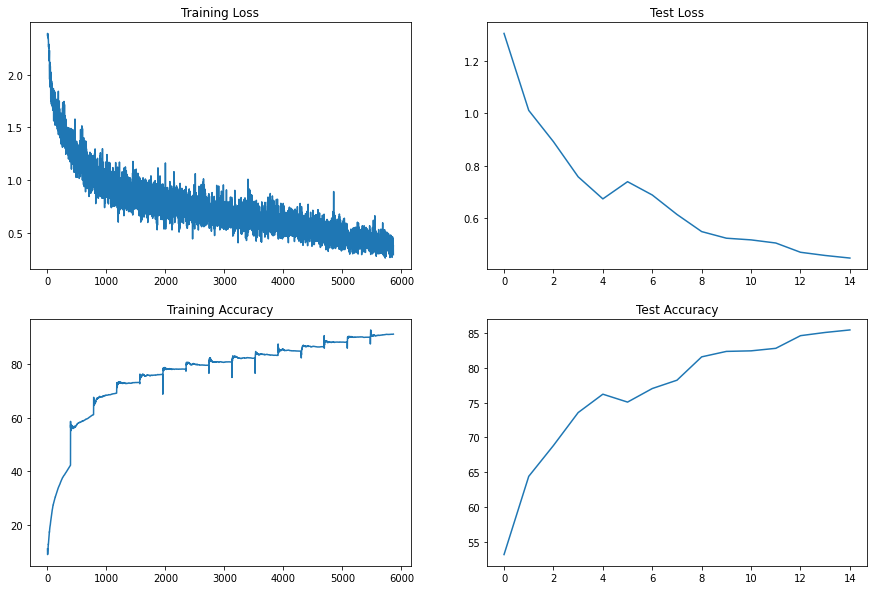

In [13]:
fig, axs = plt.subplots(2,2,figsize=(15,10))
axs[0, 0].plot(model1.train_losses)
axs[0, 0].set_title("Training Loss")
axs[1, 0].plot(model1.train_acc)
axs[1, 0].set_title("Training Accuracy")
axs[0, 1].plot(model1.test_losses)
axs[0, 1].set_title("Test Loss")
axs[1, 1].plot(model1.test_acc)
axs[1, 1].set_title("Test Accuracy")